In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
# Load the training data
train_data = pd.read_csv("train.csv")
df=train_data
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Load the test data (if needed for specific analysis)
test_data = pd.read_csv("test.csv")
dt=test_data
dt

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
dt.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
df.drop(columns=['Cabin'],inplace=True)
dt.drop(columns=['Cabin'],inplace=True)
df.drop(columns=['Ticket'],inplace=True)
dt.drop(columns=['Ticket'],inplace=True)
df.drop(columns=['PassengerId'],inplace=True)
dt.drop(columns=['PassengerId'],inplace=True)

In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [9]:
dt.isnull().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [10]:
#fill the value in train data
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [11]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
df['Embarked'].fillna('S',inplace=True)

In [13]:
# Forward fill - replace with previous valid value
df['Age'] = df['Age'].fillna(method='ffill')


In [14]:
df.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [15]:
#fill the value in test data
dt['Fare'].value_counts()

7.7500     21
26.0000    19
13.0000    17
8.0500     17
7.8958     11
           ..
7.8208      1
8.5167      1
78.8500     1
52.0000     1
22.3583     1
Name: Fare, Length: 169, dtype: int64

In [16]:
dt['Fare'].fillna(dt['Fare'].mean,inplace=True)

In [17]:
# Forward fill - replace with previous valid value
dt['Age'] = dt['Age'].fillna(method='ffill')


In [18]:
dt.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
df.shape

(891, 9)

In [20]:
# See rows with missing values
df[df.isnull().any(axis=1)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked


In [21]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.00000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.58156,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.55459,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.42000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.00000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.00000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.00000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.00000,8.000000,6.000000,512.329200


In [22]:
df['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [23]:
df['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [24]:
df['Survived']=df['Survived'].astype('category')
df['Pclass']=df['Pclass'].astype('category')
df['Sex']=df['Sex'].astype('category')
df['Age']=df['Age'].astype('int')
df['Embarked']=df['Embarked'].astype('category')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       891 non-null    int32   
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Fare      891 non-null    float64 
 8   Embarked  891 non-null    category
dtypes: category(4), float64(1), int32(1), int64(2), object(1)
memory usage: 35.4+ KB


In [26]:
df.describe()

,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000
mean,29.561167,0.523008,0.381594,32.204208
std,14.567604,1.102743,0.806057,49.693429
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


0    549
1    342
Name: Survived, dtype: int64


<AxesSubplot: xlabel='Survived', ylabel='count'>

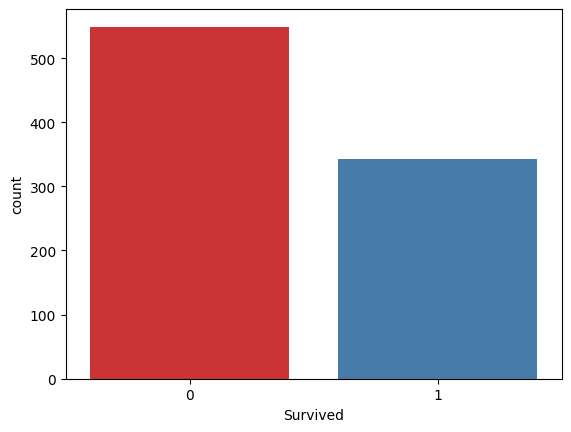

In [27]:
print(df['Survived'].value_counts())
sns.countplot(x='Survived',data=df,palette='Set1')

3    55.106622
1    24.242424
2    20.650954
Name: Pclass, dtype: float64


<AxesSubplot: xlabel='Pclass', ylabel='count'>

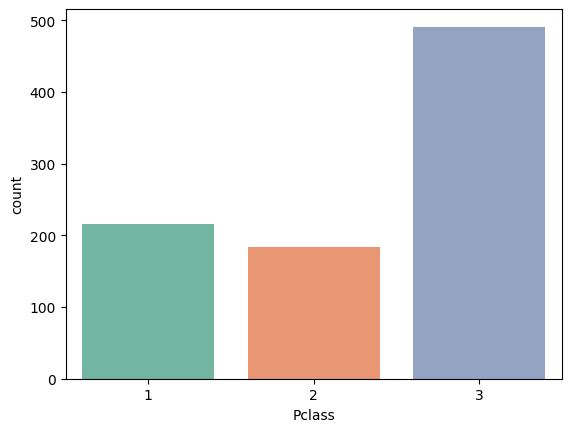

In [28]:
print((df['Pclass'].value_counts()/891)*100)
sns.countplot(x='Pclass',data=df,palette='Set2')

male      577
female    314
Name: Sex, dtype: int64


<AxesSubplot: xlabel='Sex', ylabel='count'>

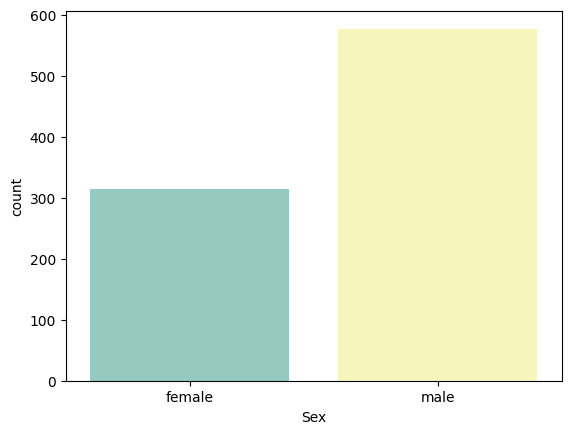

In [29]:
print(df['Sex'].value_counts())
sns.countplot(x='Sex',data=df,palette='Set3')

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


<AxesSubplot: xlabel='SibSp', ylabel='count'>

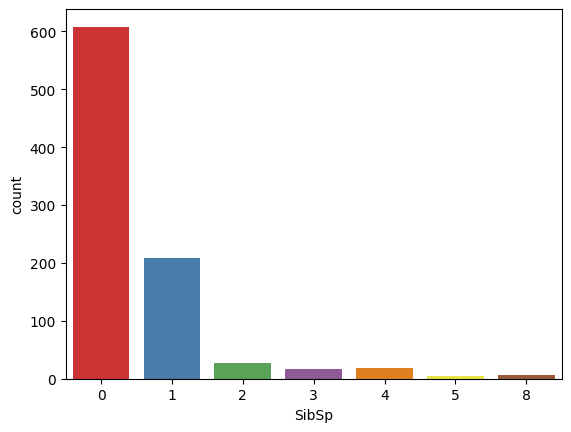

In [30]:
print(df['SibSp'].value_counts())
sns.countplot(x='SibSp',data=df,palette='Set1')

S    646
C    168
Q     77
Name: Embarked, dtype: int64


<AxesSubplot: >

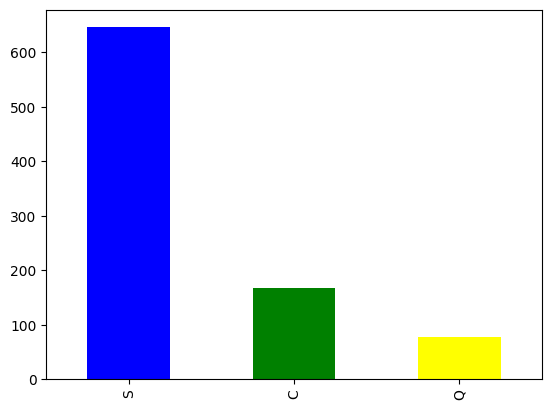

In [31]:
print(df['Embarked'].value_counts())
df['Embarked'].value_counts().plot.bar(color=['blue','green','yellow'])

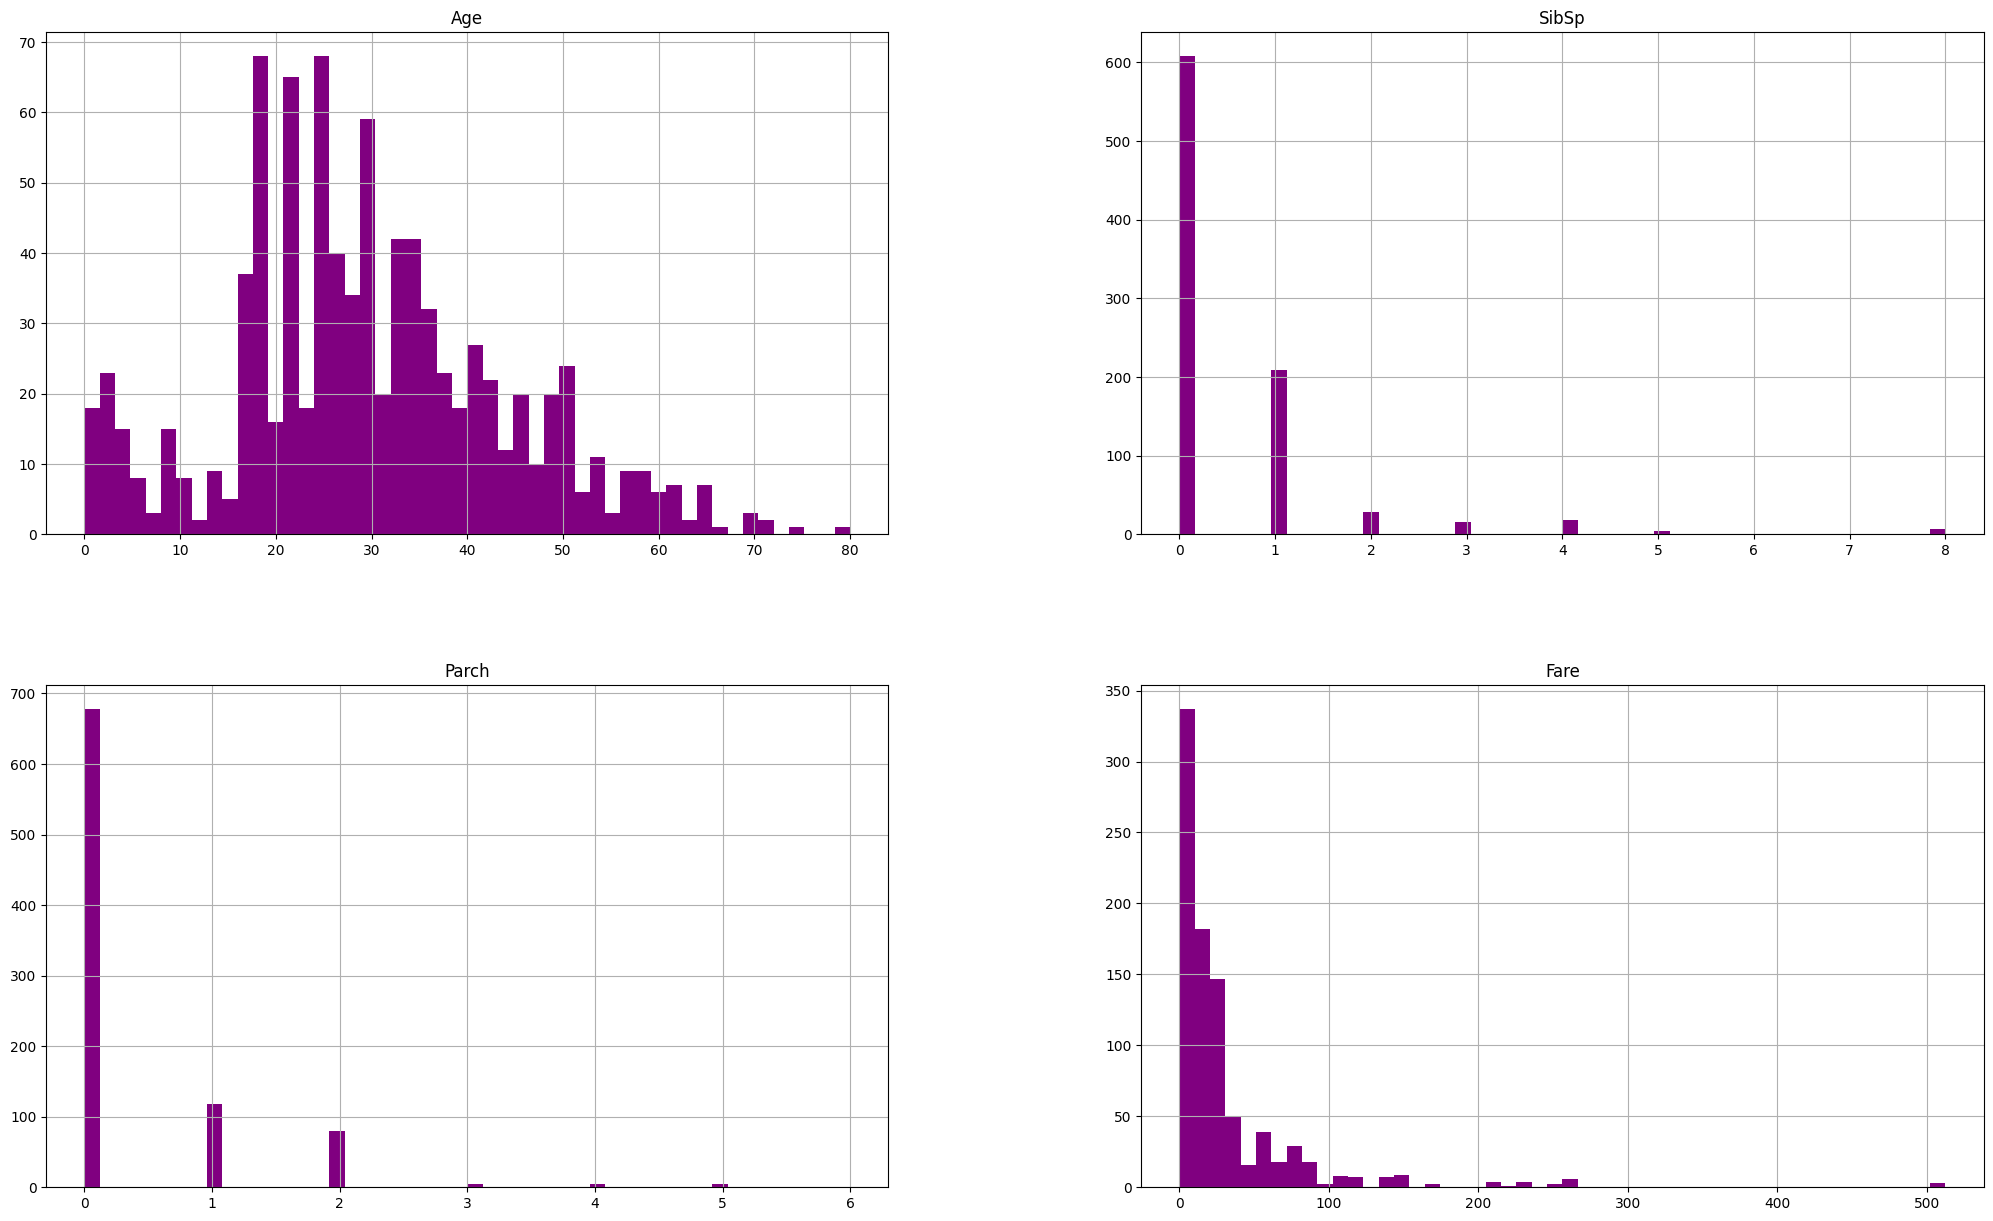

In [32]:
df.hist(bins = 50, figsize = (25,15),color='Purple')
plt.show()

<AxesSubplot: xlabel='Age', ylabel='Density'>

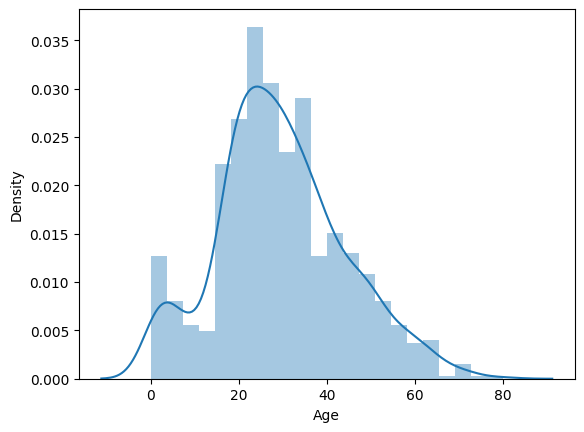

In [33]:
sns.distplot(df['Age'])

<AxesSubplot: >

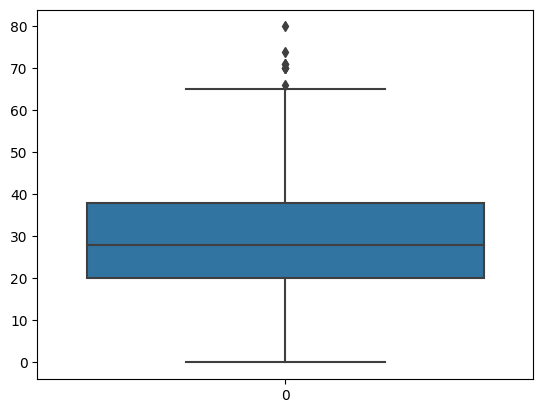

In [34]:
sns.boxplot(df['Age'])

<AxesSubplot: xlabel='Fare', ylabel='Density'>

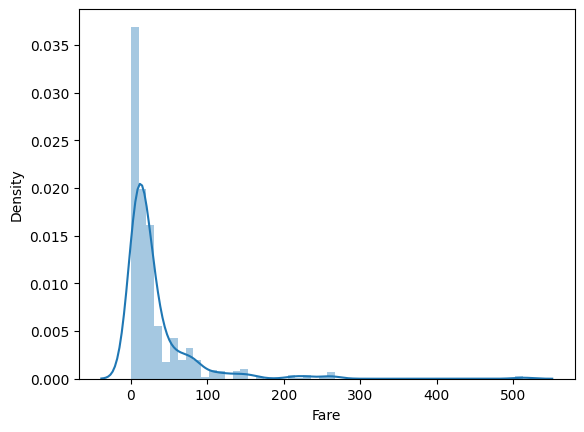

In [35]:
sns.distplot(df['Fare'])

<AxesSubplot: >

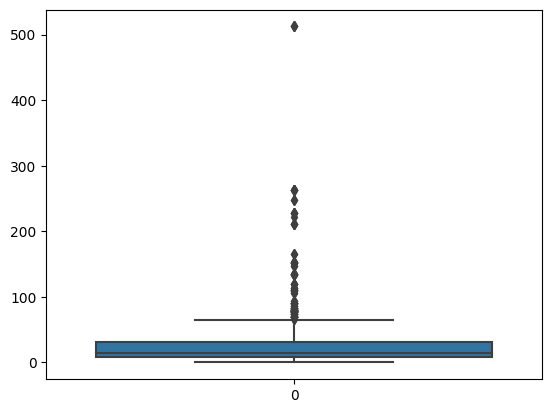

In [36]:
sns.boxplot(df['Fare'])

mulivariet analysis

Survived,0,1
Pclass,,
1,37.0,63.0
2,52.7,47.3
3,75.8,24.2


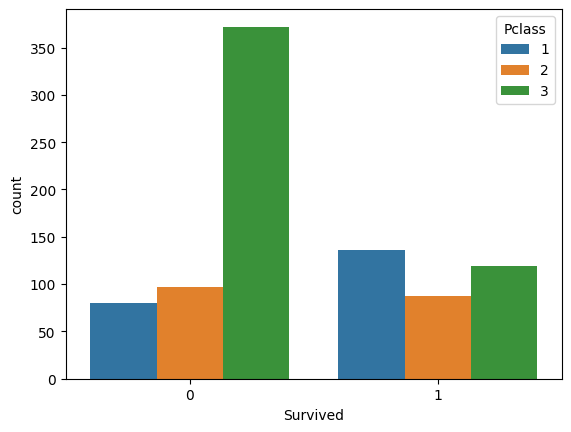

In [37]:
sns.countplot(x="Survived", hue="Pclass", data=df)
pd.crosstab(df['Pclass'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Age,,
0,20.0,80.0
1,25.0,75.0
2,62.5,37.5
3,14.3,85.7
4,33.3,66.7
...,...,...
66,100.0,0.0
70,100.0,0.0
71,100.0,0.0


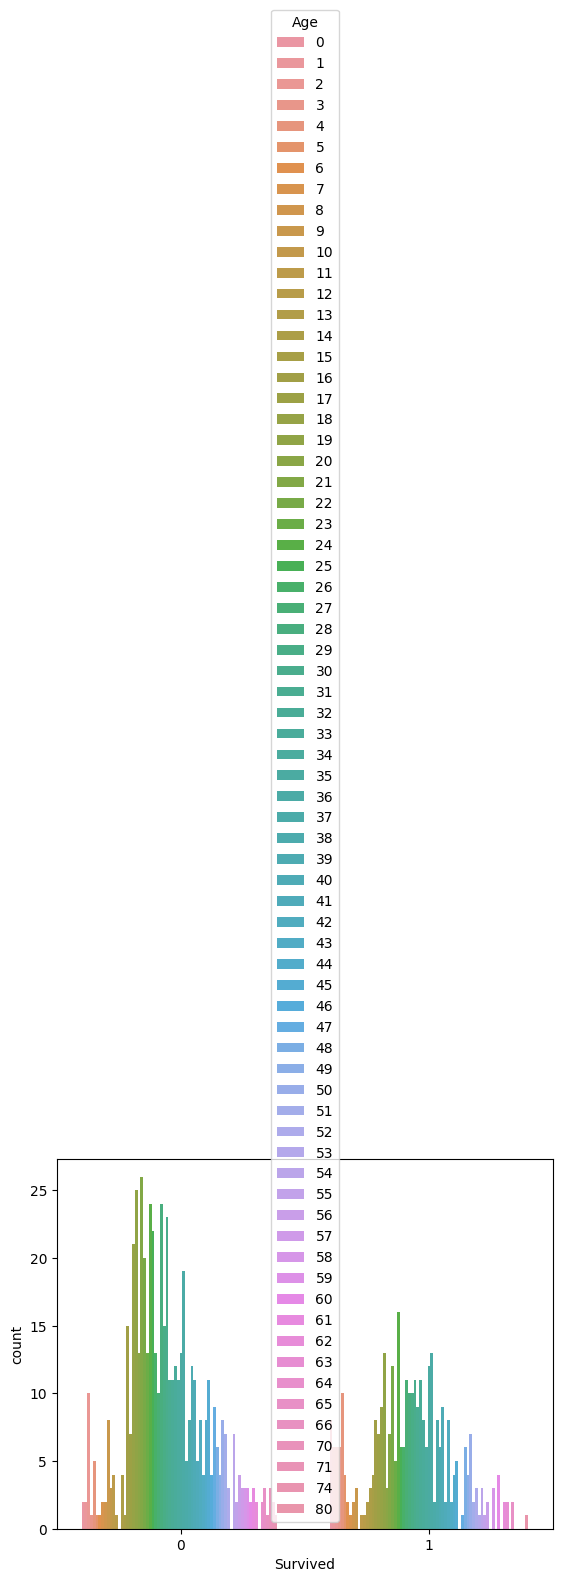

In [38]:
sns.countplot(x="Survived", hue="Age", data=df)
pd.crosstab(df['Age'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Sex,,
female,25.8,74.2
male,81.1,18.9


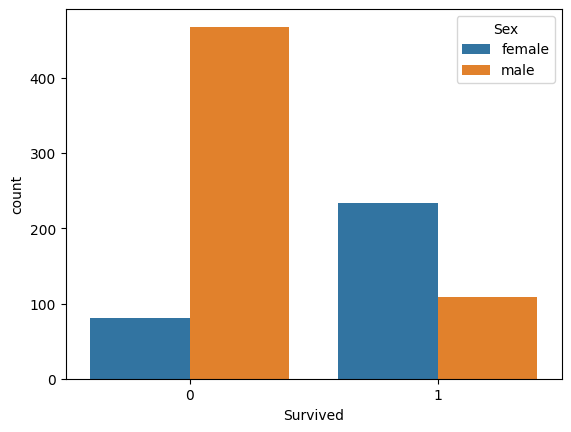

In [39]:
sns.countplot(x="Survived", hue="Sex", data=df)
pd.crosstab(df['Sex'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Embarked,,
C,44.6,55.4
Q,61.0,39.0
S,66.1,33.9


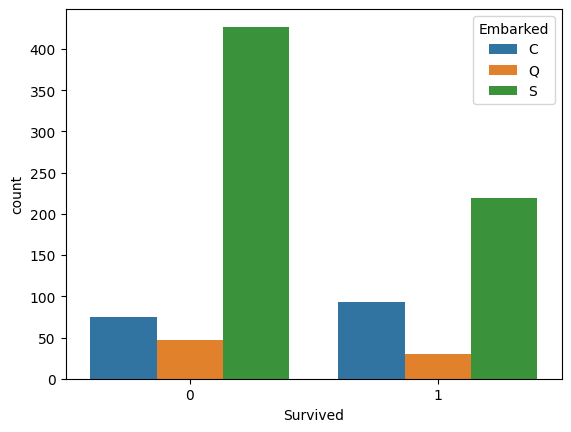

In [40]:
sns.countplot(x="Survived", hue="Embarked", data=df)
pd.crosstab(df['Embarked'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
SibSp,,
0,65.5,34.5
1,46.4,53.6
2,53.6,46.4
3,75.0,25.0
4,83.3,16.7
5,100.0,0.0
8,100.0,0.0


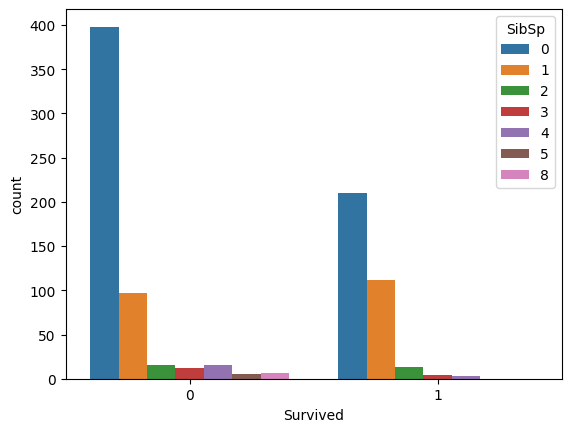

In [41]:
sns.countplot(x="Survived", hue="SibSp", data=df)
pd.crosstab(df['SibSp'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

Survived,0,1
Parch,,
0,65.6,34.4
1,44.9,55.1
2,50.0,50.0
3,40.0,60.0
4,100.0,0.0
5,80.0,20.0
6,100.0,0.0


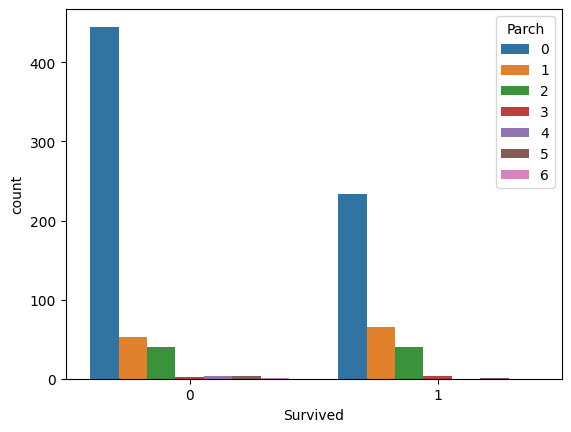

In [42]:
sns.countplot(x="Survived", hue="Parch", data=df)
pd.crosstab(df['Parch'], df['Survived']).apply(lambda r: round((r/r.sum())*100,1), axis=1)

<AxesSubplot: xlabel='Age', ylabel='Density'>

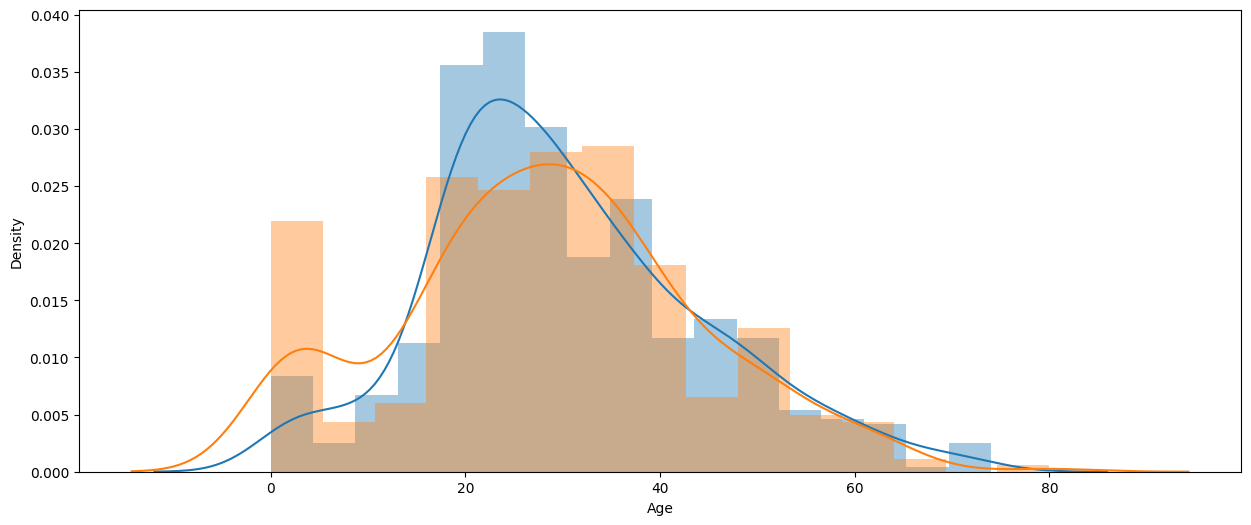

In [43]:
#survived with age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Age'])
sns.distplot(df[df['Survived']==1]['Age'])

<AxesSubplot: xlabel='SibSp', ylabel='Density'>

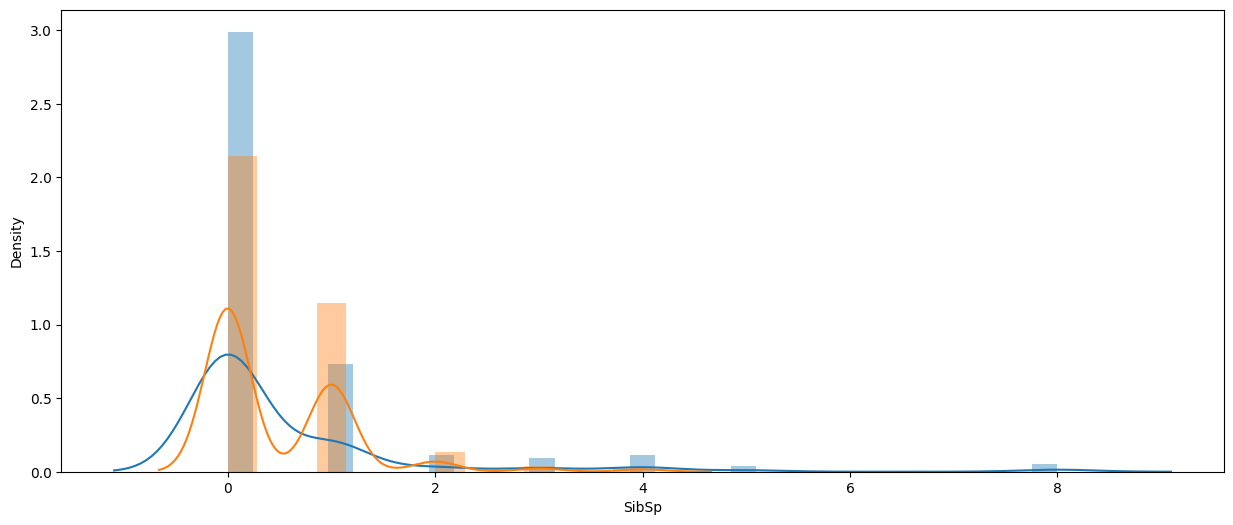

In [44]:
#survived with age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['SibSp'])
sns.distplot(df[df['Survived']==1]['SibSp'])

<AxesSubplot: xlabel='Parch', ylabel='Density'>

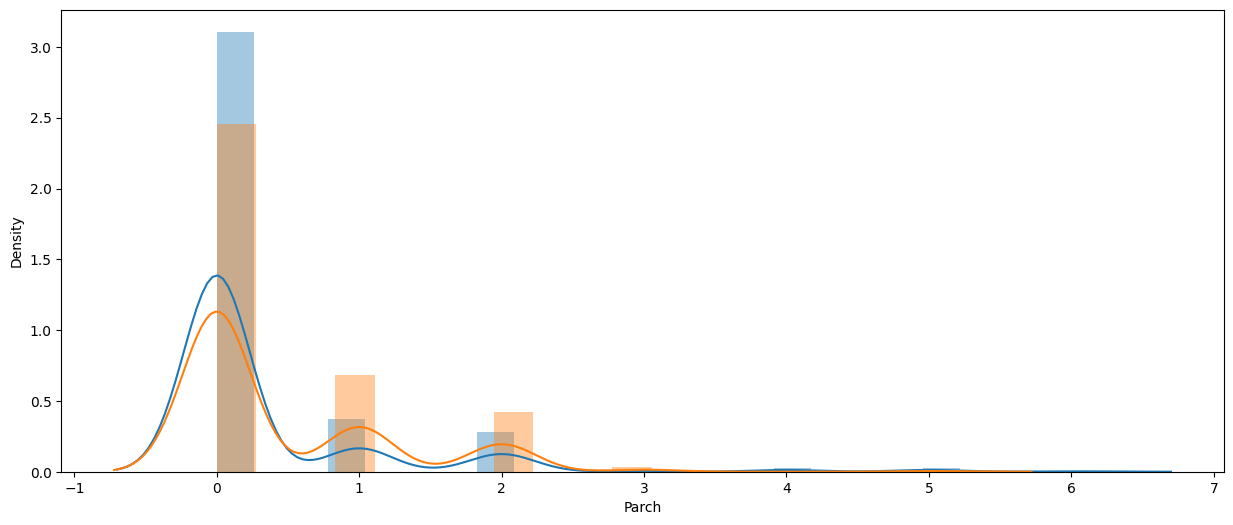

In [45]:
#survived with age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Parch'])
sns.distplot(df[df['Survived']==1]['Parch'])

<AxesSubplot: xlabel='Fare', ylabel='Density'>

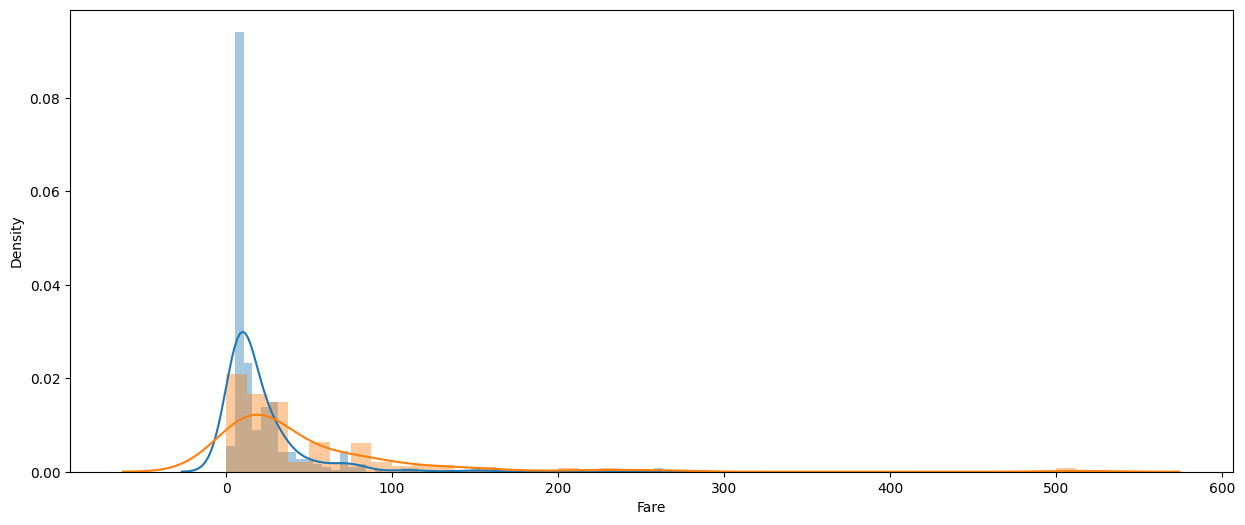

In [46]:
#survived with age

plt.figure(figsize=(15,6))
sns.distplot(df[df['Survived']==0]['Fare'])
sns.distplot(df[df['Survived']==1]['Fare'])

In [47]:
#finding out the correlation between the features
corr = df.corr()
corr.shape

(4, 4)

<AxesSubplot: >

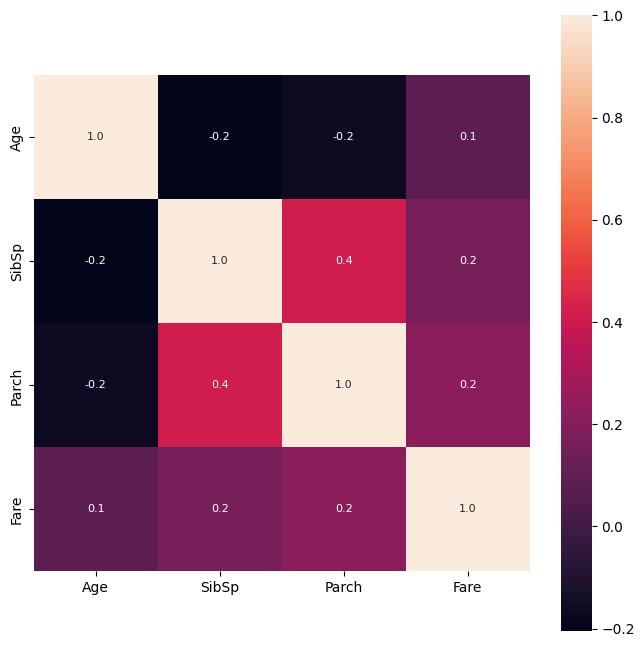

In [48]:
#plotting the heatmap of correlation between features
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8})

In [49]:
#feature enginnering

df['Family']=df['SibSp'] + df['Parch']
df.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22,1,0,7.2500,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,71.2833,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26,0,0,7.9250,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,53.1000,S,1
4,0,3,"Allen, Mr. William Henry",male,35,0,0,8.0500,S,0


In [50]:
df['Family'].value_counts()

0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: Family, dtype: int64

In [51]:
def calculate(number):
    if number==0:
        return 'Alone'
    elif number>0 and number<=4:
        return 'Medium'
    else:
        return 'Large'

In [52]:
df['family_type']=df['Family'].apply(calculate)

In [53]:
df.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,family_type
679,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36,0,1,512.3292,C,1,Medium
733,0,2,"Berriman, Mr. William John",male,23,0,0,13.0000,S,0,Alone
350,0,3,"Odahl, Mr. Nils Martin",male,23,0,0,9.2250,S,0,Alone
108,0,3,"Rekic, Mr. Tido",male,38,0,0,7.8958,S,0,Alone
305,1,1,"Allison, Master. Hudson Trevor",male,0,1,2,151.5500,S,3,Medium
334,1,1,"Frauenthal, Mrs. Henry William (Clara Heinshei...",female,16,1,0,133.6500,S,1,Medium
135,0,2,"Richard, Mr. Emile",male,23,0,0,15.0458,C,0,Alone
149,0,2,"Byles, Rev. Thomas Roussel Davids",male,42,0,0,13.0000,S,0,Alone
270,0,1,"Cairns, Mr. Alexander",male,35,0,0,31.0000,S,0,Alone
535,1,2,"Hart, Miss. Eva Miriam",female,7,0,2,26.2500,S,2,Medium


In [54]:
df.drop(columns=['SibSp','Parch','Family'],inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family_type
0,0,3,"Braund, Mr. Owen Harris",male,22,7.2500,S,Medium
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,71.2833,C,Medium
2,1,3,"Heikkinen, Miss. Laina",female,26,7.9250,S,Alone
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,53.1000,S,Medium
4,0,3,"Allen, Mr. William Henry",male,35,8.0500,S,Alone


In [55]:
pd.crosstab(df['family_type'],df['Survived']).apply(lambda r:round((r/r.sum())*100,1),axis=1)

Survived,0,1
family_type,,
Alone,69.6,30.4
Large,85.1,14.9
Medium,44.0,56.0


In [56]:
#handling outliers

Q1=np.percentile(df['Fare'],25)
Q3=np.percentile(df['Fare'],75)

outlier_lower = Q1-1.5*(Q3-Q1)
outlier_high = Q3+1.5*(Q3-Q1)

df=df[(df['Fare']>outlier_lower) & (df['Fare']<outlier_high)]

In [57]:
#one hot encoding
df.sample(5)

df=pd.get_dummies(data=df, columns=['Pclass','Sex','Embarked','family_type'],drop_first=True)
df

,Survived,Name,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,family_type_Large,family_type_Medium
0,0,"Braund, Mr. Owen Harris",22,7.2500,0,1,1,0,1,0,1
2,1,"Heikkinen, Miss. Laina",26,7.9250,0,1,0,0,1,0,0
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35,53.1000,0,0,0,0,1,0,1
4,0,"Allen, Mr. William Henry",35,8.0500,0,1,1,0,1,0,0
5,0,"Moran, Mr. James",35,8.4583,0,1,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
886,0,"Montvila, Rev. Juozas",27,13.0000,1,0,1,0,1,0,0
887,1,"Graham, Miss. Margaret Edith",19,30.0000,0,0,0,0,1,0,0
888,0,"Johnston, Miss. Catherine Helen ""Carrie""",19,23.4500,0,1,0,0,1,0,1
889,1,"Behr, Mr. Karl Howell",26,30.0000,0,0,1,0,0,0,0


In [58]:
#finding out the correlation between the features
corr = df.corr()
corr.shape

(9, 9)

<AxesSubplot: >

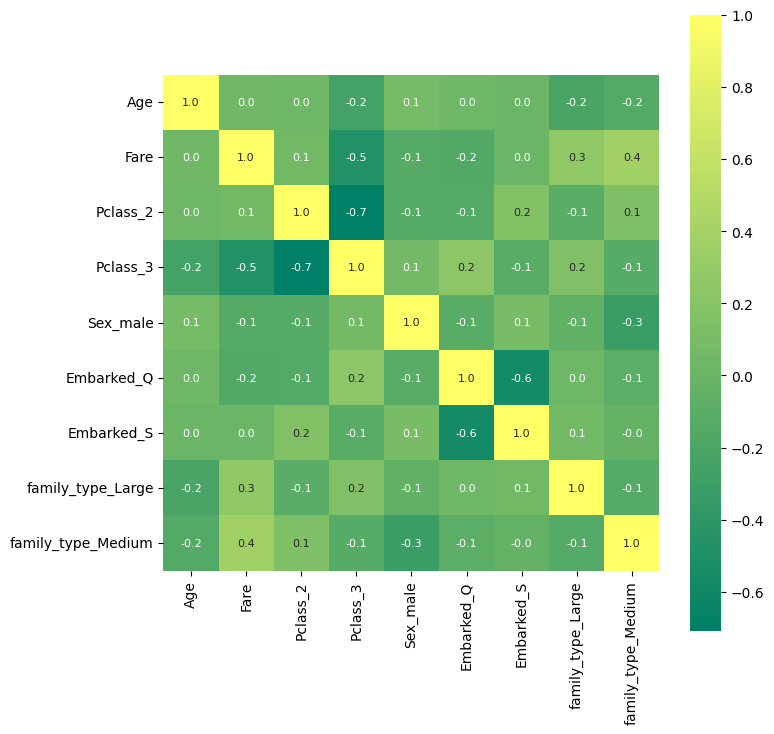

In [62]:
#plotting the heatmap of correlation between features
plt.figure(figsize=(8,8))
sns.heatmap(corr, cmap='summer', cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8})